# Phase 3 Project

Data can be found at: https://www.kaggle.com/itsmesunil/bank-loan-modelling

The data found for this project was collected by a bank.  They wanted to determine who was the most likely to accept the offer for a personal loan.  

The business problem is to expand the number of 'asset customers' the bank has.  This means customers who are paying interst to the bank and there for increasing the bank's overall networth.  The idea is to create a machine learning model that will accurately predict the liklihood someone will accept a personal loan. Using this informatino the bank can selectively market their personal loan program and expand their number of 'asset customers'.

## Data Description:

### ID
Customer ID
### Age
Customer's age in completed years
### Experience
years of professional experience
### Income
Annual income of the customer (thousands)
### ZIPCode
Home Address ZIP code.
### Family
Family size of the customer
### CCAvg
Avg. spending on credit cards per month (thousands)
### Education
Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
### Mortgage
Value of house mortgage if any. (thousands)
### Personal Loan
Did this customer accept the personal loan offered in the last campaign?
### Securities Account
Does the customer have a securities account with the bank?
### CD Account
Does the customer have a certificate of deposit (CD) account with the bank?
### Online
Does the customer use internet banking facilities?
### CreditCard
Does the customer use a credit card issued by UniversalBank?

#### Import the data.

In [276]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

In [277]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [278]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [279]:
df.shape

(5000, 14)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIP Code'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

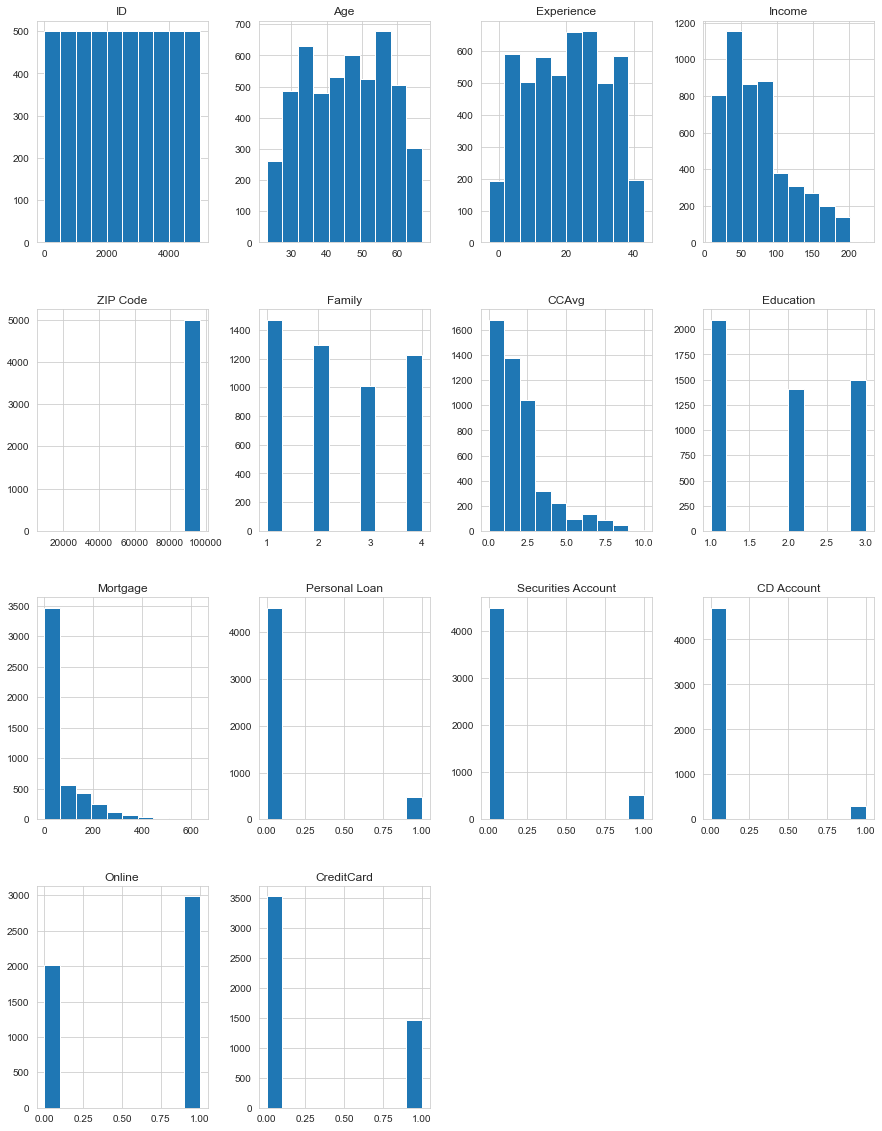

In [281]:
df.hist(figsize = (15, 20))

## Cleaning the Data:

In [282]:
# This dataset was relatively easy to work with.  It was very complete and did not have any strange data types or objects.

In [283]:
# Dropped Zip code and ID as they were irrelevant.  Underscores were used to replace spaces in column names to save a headache.

In [284]:
df = df.drop(columns = ['ZIP Code', 'ID'])

In [285]:
df.columns = df.columns.str.replace(' ', '_')

In [286]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [287]:
## Mortgage and credit card average need to be split by T/F and continuous data.
#Create two new columns:
#The first is replacing any numerical value not 0 with 1.
#The second is using what numerical value there is to create a normal distribution of data for Mortage amount and average monthly CC spending

In [288]:
### First I created a new column that is categorical determining if said person is a mortgage holder or not.
#This was done with a lambda function followed by multiplying everytning by 1 to convert the column from booleans to 0 and 1.

In [289]:
df['Mrtg_holder'] = df['Mortgage'].map(lambda x: True if (x != 0) else False)*1

In [290]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

      Mrtg_holder  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
4995            0  
4996            1  
4997            0  
4998            0  
4999            0  

[5000 rows x 13 columns]

In [291]:
### Next is changing all of the 0 values in the Mortgage column to actual values that could be used in the data set.
# We only lost 5 values during the process which is great.

In [292]:
# 0 values were converted to NaN values and then interpolated according to thier index.

In [293]:
df['Mortgage'] = df['Mortgage'].replace(0, np.nan)

In [294]:
df = df.interpolate(method = 'values')

In [295]:
### Let's do it again with CCAvg

In [296]:
df['CCAvg'] = df['CCAvg'].replace(0, np.nan)

In [297]:
df = df.interpolate(method = 'values')

In [298]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1       NaN   
1      45          19      34       3    1.5          1       NaN   
2      39          15      11       1    1.0          1       NaN   
3      35           9     100       1    2.7          2       NaN   
4      35           8      45       4    1.0          2       NaN   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3      88.0   
4996   30           4      15       4    0.4          1      85.0   
4997   63          39      24       2    0.3          3      85.0   
4998   65          40      49       3    0.5          2      85.0   
4999   28           4      83       3    0.8          1      85.0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

      Mrtg_holder  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
4995            0  
4996            1  
4997            0  
4998            0  
4999            0  

[5000 rows x 13 columns]

In [299]:
# Dropping remaining null values.

In [300]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              5
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Mrtg_holder           0
dtype: int64

In [301]:
df = df.dropna()

In [302]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
5      37          13      29       4    0.4          2    155.00   
6      53          27      72       2    1.5          2    138.00   
7      50          24      22       1    0.3          3    121.00   
8      35          10      81       3    0.6          2    104.00   
9      34           9     180       1    8.9          3    107.75   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3     88.00   
4996   30           4      15       4    0.4          1     85.00   
4997   63          39      24       2    0.3          3     85.00   
4998   65          40      49       3    0.5          2     85.00   
4999   28           4      83       3    0.8          1     85.00   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
5                 0                   0           0       1           0   
6                 0                   0           0       1           0   
7                 0                   0           0       0           1   
8                 0                   0           0       1           0   
9                 1                   0           0       0           0   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

      Mrtg_holder  
5               1  
6               0  
7               0  
8               1  
9               0  
...           ...  
4995            0  
4996            1  
4997            0  
4998            0  
4999            0  

[4995 rows x 13 columns]

### Removing Outliers

In [303]:
##Both the z score and intequantile methods were far too aggressive.  Both methods cut the data in half.
## Removing outliers also killed the Personal_Loan column which is essential to this project.  
#This was a very clean data set so it is possible they were already removed.
#however there is the problem of the skew...

In [304]:
df.describe()

Age   Experience       Income       Family        CCAvg  \
count  4995.000000  4995.000000  4995.000000  4995.000000  4995.000000   
mean     45.347948    20.114314    73.800200     2.396196     1.979247   
std      11.463068    11.467910    46.040123     1.147417     1.732354   
min      23.000000    -3.000000     8.000000     1.000000     0.100000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.600000   
75%      55.000000    30.000000    98.000000     3.000000     2.600000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal_Loan  Securities_Account  \
count  4995.000000  4995.000000    4995.000000         4995.000000   
mean      1.881481   184.354555       0.096096            0.104104   
std       0.840008    88.581788       0.294752            0.305426   
min       1.000000    75.000000       0.000000            0.000000   
25%       1.000000   120.000000       0.000000            0.000000   
50%       2.000000   160.400000       0.000000            0.000000   
75%       3.000000   223.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

        CD_Account       Online   CreditCard  Mrtg_holder  
count  4995.000000  4995.000000  4995.000000  4995.000000  
mean      0.060460     0.597397     0.294094     0.307908  
std       0.238362     0.490471     0.455680     0.461674  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     1.000000     0.000000     0.000000  
75%       0.000000     1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal_Loan'}>],
       [<AxesSubplot:title={'center':'Securities_Account'}>,
        <AxesSubplot:title={'center':'CD_Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>],
       [<AxesSubplot:title={'center':'Mrtg_holder'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

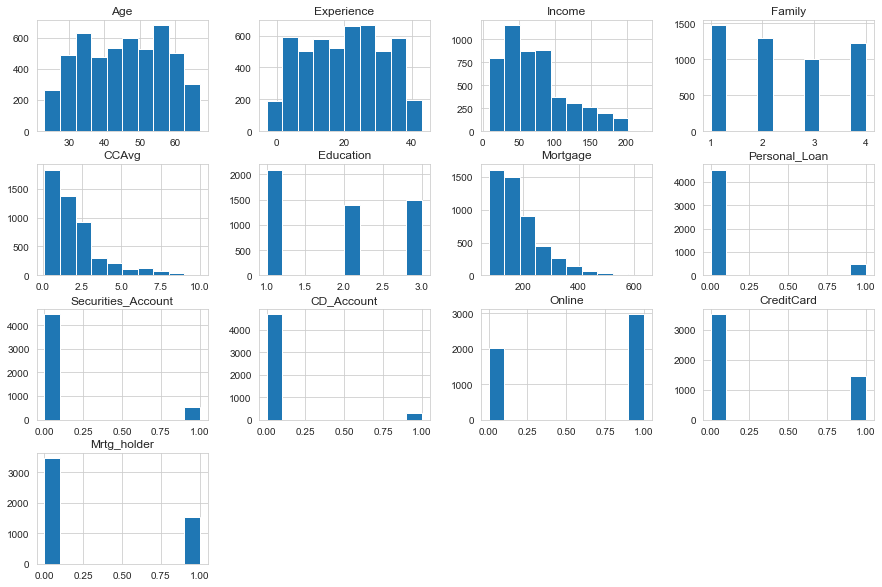

In [305]:
df.hist(figsize = (15,10))

In [306]:
# Custom Removal of Outliers

In [307]:
df = df[df['CCAvg'] < 8.5]

<AxesSubplot:>

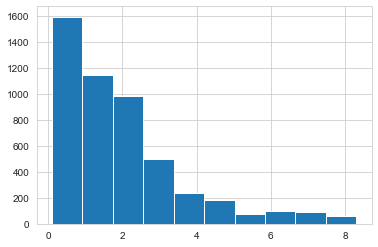

In [308]:
df['CCAvg'].hist()

In [309]:
df = df[df['Mortgage'] < 500]

<AxesSubplot:>

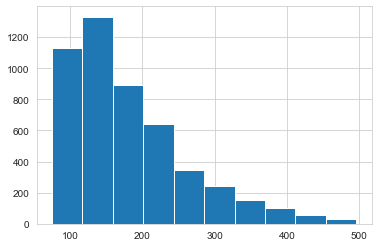

In [310]:
df['Mortgage'].hist()

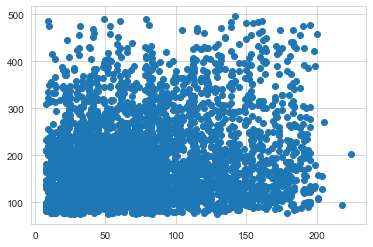

In [311]:
plt.scatter(x = 'Income', y = 'Mortgage', data= df)

In [312]:
df = df.astype(float)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4926 entries, 5 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4926 non-null   float64
 1   Experience          4926 non-null   float64
 2   Income              4926 non-null   float64
 3   Family              4926 non-null   float64
 4   CCAvg               4926 non-null   float64
 5   Education           4926 non-null   float64
 6   Mortgage            4926 non-null   float64
 7   Personal_Loan       4926 non-null   float64
 8   Securities_Account  4926 non-null   float64
 9   CD_Account          4926 non-null   float64
 10  Online              4926 non-null   float64
 11  CreditCard          4926 non-null   float64
 12  Mrtg_holder         4926 non-null   float64
dtypes: float64(13)
memory usage: 538.8 KB


## EDA:

In [314]:
## Taking a closer look at Ranges of 

([<matplotlib.axis.XTick at 0x7ffab0705ca0>,
 [Text(0.0, 0, 'Denied'), Text(1.0, 0, 'Approved')])

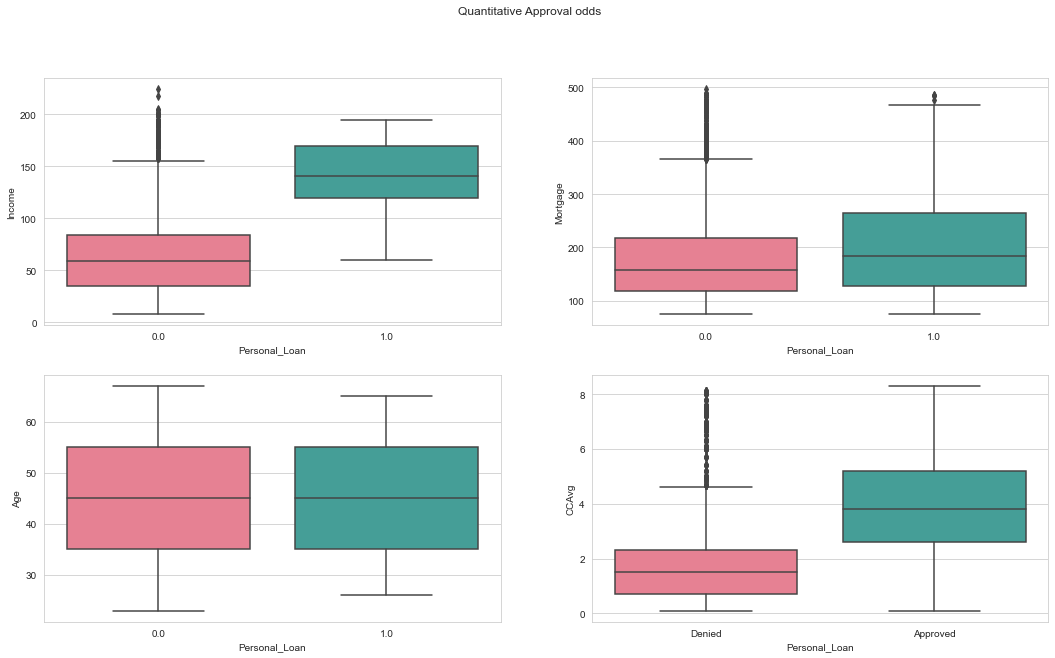

In [331]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle("Quantitative Approval odds", )

sns.boxplot(ax=axes[0, 0], data=df, x='Personal_Loan', y='Income', palette = 'husl')
sns.boxplot(ax=axes[0, 1], data=df, x='Personal_Loan', y='Mortgage', palette = 'husl')
sns.boxplot(ax=axes[1, 0], data=df, x='Personal_Loan', y='Age', palette = 'husl')
sns.boxplot(ax=axes[1, 1], data=df, x='Personal_Loan', y='CCAvg', palette = 'husl')
plt.xticks([0.0,1.0], ["Denied", "Approved"])



In [318]:
import plotly.express as px
fig = px.scatter(df, x= 'Income', y='CCAvg')
fig.show()

In [319]:
fig2 = px.scatter(df, x = 'Income', y = 'Mortgage')
fig2.show()

In [321]:
fig3 = px.scatter(df, x = 'Income', y = 'Age')
fig3.show()

In [ ]:
sns.boxplot(x = 'Education', y = 'Income', data = df, hue = 'Personal_Loan')

In [ ]:
sns.boxplot(x = 'Family', y = 'Mortgage', data = df, hue = 'Personal_Loan')

## Building Models:

In [ ]:
## Dummy variables

In [ ]:
pd.get_dummies(df, columns = ['Family', 'Education'], drop_first = True)

In [ ]:
## Train Test Split

In [ ]:
X = df.drop('Personal_Loan', axis = 1)
y = df['Personal_Loan']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_log = logreg.fit(X_train, y_train)
model_log

In [ ]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)


In [ ]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

In [ ]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

#### Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues,
                     display_labels = ['Denied', 'Approved'])
plt.show()

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_hat_test)
# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_hat_test, average=None)
# Precision
from sklearn.metrics import precision_score
Precision = precision_score(y_test, y_hat_test, average=None)

In [ ]:
print(Accuracy)
print(Recall)
print(Precision)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat_test, average=None)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
#create a decision tree and fit it to the training data
df_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state = 1)
df_dt = df_dt.fit(X_train, y_train)

In [ ]:
plt.figure(figsize = (15, 7.5))
plot_tree(df_dt, filled = True, rounded = True, class_names = ['Denied', 'Approved'], feature_names = X.columns)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_pred = df_dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
plot_confusion_matrix(df_dt, X_test, y_test, display_labels = ['Denied', 'Approved'] )

In [ ]:
f1_score(y_test, y_pred, average=None)